# Representação modelo Presa-Predador


---


O programa desenvolvido busca representar um modelo de presa-predador. O modelo usa como base a [Equação de Lotka-Volterra](https://pt.wikipedia.org/wiki/Equa%C3%A7%C3%A3o_de_Lotka-Volterra), que de maneira simples modela a relação de população de presas e predadores usando de equações diferenciais, não lineares e de primeira ordem.

![Representação de populações de Linces e Lebres](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Milliers_fourrures_vendues_en_environ_90_ans_odum_1953_en.jpg/330px-Milliers_fourrures_vendues_en_environ_90_ans_odum_1953_en.jpg)

### Importando biblotecas

Para criar a representação será necessário utilizar bibliotecas, as bibliotecas utilizadas foram:


*   [Numpy](https://numpy.org/)
*   [Matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Definindo Variáveis

In [2]:
presa_inicial = 12
predador_inicial = 3

# Taxas
aa = 0.8
bb = 0.1
cc = 0.1
dd = 0.5

presas = [presa_inicial]
predadores = [predador_inicial]

ultimo_presa = presa_inicial
ultimo_predador = predador_inicial

dt = 0.001
Tt = 40
tV = np.arange(0,Tt+dt,dt)

### Definição de Funções

In [3]:
def calcula_euler(ultimo_presa,ultimo_predador):
  dpresadt = (aa*ultimo_presa - bb*ultimo_presa*ultimo_predador)
  dpredadordt = (cc*ultimo_presa*ultimo_predador - dd*ultimo_predador)
  presa = (dpresadt*dt)+ultimo_presa
  predador = (dpredadordt*dt)+ultimo_predador
  return presa, predador

In [4]:
def calcula_rk4(ultimo_presa,ultimo_predador):
  kX1 = aa*ultimo_presa - bb*ultimo_presa*ultimo_predador
  kY1 = cc*ultimo_presa*ultimo_predador - dd*ultimo_predador
  kX2 = aa*(ultimo_presa+kX1*dt/2) - (bb*(ultimo_presa+kX1*dt/2)*
                                      (ultimo_predador+kY1*dt/2))
  kY2 = cc*(ultimo_presa+kX1*dt/2)*(ultimo_predador+kY1*dt/2) - dd*(ultimo_predador+kY1*dt/2)
  kX3 = aa*(ultimo_presa+kX2*dt/2) - bb*(ultimo_presa+kX2*dt/2)*(ultimo_predador+kY2*dt/2)
  kY3 = cc*(ultimo_presa+kX2*dt/2)*(ultimo_predador+kY2*dt/2) - dd*(ultimo_predador+kY2*dt/2)
  kX4 = aa*(ultimo_presa+kX3*dt) - bb*(ultimo_presa+kX3*dt)*(ultimo_predador+kY3*dt)
  kY4 = cc*(ultimo_presa+kX3*dt)*(ultimo_predador+kY3*dt) - dd*(ultimo_predador+kY3*dt)
  dpresadt = (kX1 + 2*kX2 + 2*kX3 + kX4)/6
  dpredadordt = (kY1 + 2*kY2 + 2*kY3 + kY4)/6
  presa = (dpresadt*dt)+ultimo_presa
  predador = (dpredadordt*dt)+ultimo_predador
  return presa, predador


## Execução da simulação

In [5]:
for tt in range(len(tV)):

  ultimo_presa, ultimo_predador = calcula_rk4(ultimo_presa,ultimo_predador)

  presas.append(ultimo_presa)
  predadores.append(ultimo_predador)


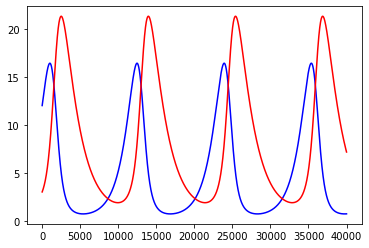

In [6]:
plt.plot(presas,'b')
plt.plot(predadores,'r')

> Você pode mudar o método de cálculo (dentro do laço for), executar a inicialização e o laço novamente e a célula abaixo para comparar os dois métodos.

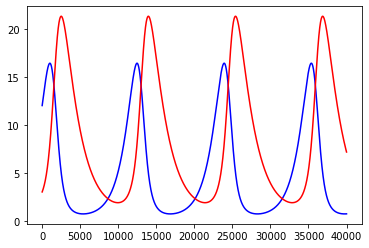

In [7]:
plt.plot(presas,'b')
plt.plot(predadores,'r')

Abaixo temos o Espaço de fase da equação de Lotka-Volterra.

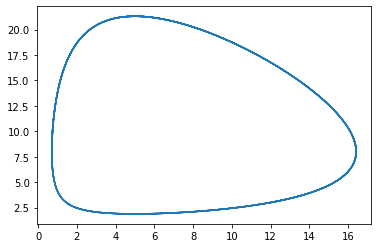

In [8]:
plt.plot(presas, predadores)

## Autoria


---



Programa desenvolvido por Lisandra Melo (<mendie73@gmail.com>).

&copy; IMD/UFRN 2021-2022.